# STEP 6: Calculate zonal statistics

In order to evaluate the connection between vegetation health and
redlining, we need to summarize NDVI across the same geographic areas as
we have redlining information.

First, import variables from previous notebooks:

In [15]:
store -r denver_proj_aoi_gdf denver_ndvi_da

In [16]:
denver_proj_aoi_gdf


,area_id,city,state,city_surve,category,grade,label,residentia,commercial,industrial,fill,geometry
1103,6525,Denver,CO,True,Best,A,A1,True,False,False,#76a865,"POLYGON ((-11678320.725 4829323.016, -11678331..."
1104,6529,Denver,CO,True,Best,A,A2,True,False,False,#76a865,"POLYGON ((-11679886.99 4828015.708, -11679894...."
1105,6537,Denver,CO,True,Best,A,A3,True,False,False,#76a865,"POLYGON ((-11678840.587 4826115.132, -11679394..."
1106,6536,Denver,CO,True,Best,A,A4,True,False,False,#76a865,"POLYGON ((-11684111.565 4826657.91, -11684111...."
1107,6540,Denver,CO,True,Best,A,A5,True,False,False,#76a865,"POLYGON ((-11684044.773 4825866.188, -11684034..."
1108,6550,Denver,CO,True,Best,A,A6,True,False,False,#76a865,"POLYGON ((-11683373.517 4821960.603, -11683509..."
1109,6526,Denver,CO,True,Still Desirable,B,B1,True,False,False,#7cb5bd,"POLYGON ((-11680543.775 4829421.469, -11680553..."
1110,6562,Denver,CO,True,Still Desirable,B,B10,True,False,False,#7cb5bd,"POLYGON ((-11692920.276 4828807.601, -11692542..."
1111,6564,Denver,CO,True,Still Desirable,B,B11,True,False,False,#7cb5bd,"POLYGON ((-11694407.504 4831493.555, -11693437..."
1112,6567,Denver,CO,True,Still Desirable,B,B12,True,False,False,#7cb5bd,"POLYGON ((-11691364.03 4831605.063, -11691407...."


In [17]:
denver_ndvi_da

<xarray.DataArray (y: 447, x: 504)> Size: 901kB
array([[ 0.6387385 ,  0.58588624,  0.60939294, ...,  0.42886385,
         0.4490929 ,  0.6548124 ],
       [ 0.6394984 ,  0.56474817,  0.6551511 , ...,  0.4907355 ,
         0.4332443 ,  0.60560626],
       [ 0.56208944,  0.53956836,  0.58609277, ...,  0.4952128 ,
         0.54162043,  0.5768989 ],
       ...,
       [-0.44827586, -0.46341464, -0.5128205 , ...,  0.49735266,
         0.6539264 ,  0.69990563],
       [-0.44578314, -0.46341464, -0.4933333 , ...,  0.62182057,
         0.7494679 ,  0.7715995 ],
       [-0.5064935 , -0.48717952, -0.5277778 , ...,  0.6248052 ,
         0.67142856,  0.65192586]], dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 4kB 4.947e+05 4.947e+05 ... 5.097e+05 5.097e+05
  * y            (y) float64 4kB 4.4e+06 4.4e+06 4.4e+06 ... 4.387e+06 4.387e+06
    spatial_ref  int64 8B 0

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import packages</div></div><div class="callout-body-container callout-body"><p>Some packages are included that will help you calculate statistics
for areas imported below. Add packages for:</p>
<ol type="1">
<li>Interactive plotting of tabular and vector data</li>
<li>Working with categorical data in <code>DataFrame</code>s</li>
</ol></div></div>

In [22]:
import pandas as pd # Interactive plots with pandas
 # Ordered categorical data
import regionmask # Convert shapefile to mask
from xrspatial import zonal_stats # Calculate zonal statistics

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Convert vector to raster</div></div><div class="callout-body-container callout-body"><p>You can convert your vector data to a raster mask using the
<code>regionmask</code> package. You will need to give
<code>regionmask</code> the geographic coordinates of the grid you are
using for this to work:</p>
<ol type="1">
<li>Replace <code>gdf</code> with your redlining
<code>GeoDataFrame</code>.</li>
<li>Add code to put your <code>GeoDataFrame</code> in the same CRS as
your raster data.</li>
<li>Replace <code>x_coord</code> and <code>y_coord</code> with the x and
y coordinates from your raster data.</li>
</ol></div></div>

In [18]:
denver_proj_aoi_gdf.columns

Index(['area_id', 'city', 'state', 'city_surve', 'category', 'grade', 'label',
       'residentia', 'commercial', 'industrial', 'fill', 'geometry'],
      dtype='object')

Help on function stats in module xrspatial.zonal:

stats(zones: xarray.core.dataarray.DataArray, values: xarray.core.dataarray.DataArray, zone_ids: Optional[List[Union[int, float]]] = None, stats_funcs: Union[Dict, List] = ['mean', 'max', 'min', 'sum', 'std', 'var', 'count'], nodata_values: Union[int, float] = None, return_type: str = 'pandas.DataFrame') -> Union[pandas.core.frame.DataFrame, dask.dataframe.core.DataFrame, xarray.core.dataarray.DataArray]
    Calculate summary statistics for each zone defined by a `zones`
    dataset, based on `values` aggregate.
    
    A single output value is computed for every zone in the input `zones`
    dataset.
    
    This function currently supports numpy backed, and dask with numpy backed
    xarray DataArrays.
    
    Parameters
    ----------
    zones : xr.DataArray
        zones is a 2D xarray DataArray of numeric values.
        A zone is all the cells in a raster that have the same value,
        whether or not they are contiguous. T

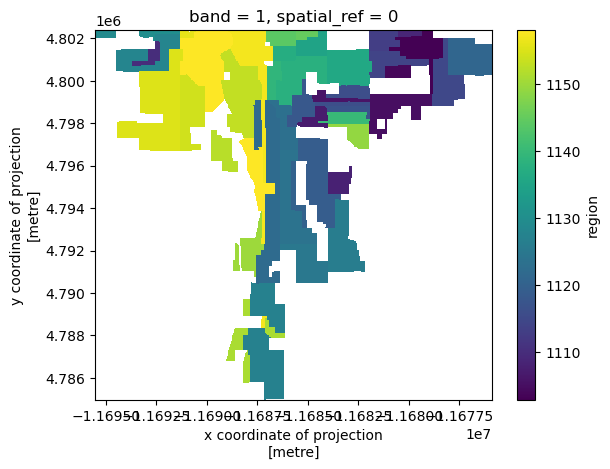

In [24]:
help (zonal_stats)

# denver_redlining_mask = regionmask.mask_geopandas(
#     denver_proj_aoi_gdf,
#     denver_ndvi_da.x, denver_ndvi_da.y,
#     # The regions do not overlap
#     overlap=False,
#     # We're not using geographic coordinates
#     wrap_lon=False
# )

#now try with chatgpb
# import cartopy.crs as ccrs

# # Ensure both `denver_ndvi_da` and `denver_proj_aoi_gdf` use the same projection
# target_crs = ccrs.Mercator()

# # Reproject denver_proj_aoi_gdf to Mercator if it isn’t already
# denver_proj_aoi_gdf = denver_proj_aoi_gdf.to_crs(target_crs.proj4_init)

# # Now use regionmask.mask_geopandas with the projected coordinates
# denver_redlining_mask = regionmask.mask_geopandas(
#     denver_proj_aoi_gdf,
#     denver_ndvi_da.x, denver_ndvi_da.y,
#     overlap=False,
#     wrap_lon=False
# )

import regionmask
import cartopy.crs as ccrs

# Ensure both are in the same CRS, here Mercator for instance
target_crs = ccrs.Mercator()

# Reproject `denver_proj_aoi_gdf` if needed
if denver_proj_aoi_gdf.crs != target_crs.proj4_init:
    denver_proj_aoi_gdf = denver_proj_aoi_gdf.to_crs(target_crs.proj4_init)

# Similarly, check and reproject `denver_ndvi_da` if it supports CRS
if hasattr(denver_ndvi_da, 'rio'):
    denver_ndvi_da = denver_ndvi_da.rio.reproject(target_crs.proj4_init)

# Confirm coordinate names align
lon, lat = denver_ndvi_da.x, denver_ndvi_da.y

# Mask using regionmask
denver_redlining_mask = regionmask.mask_geopandas(
    denver_proj_aoi_gdf,
    lon, lat,
    overlap=False,
    wrap_lon=False
)

denver_redlining_mask.plot(robust=True)

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Calculate zonal statistics</div></div><div class="callout-body-container callout-body"><p>Calculate zonal status using the <code>zonal_stats()</code> function.
To figure out which arguments it needs, use either the
<code>help()</code> function in Python, or search the internet.</p></div></div>

In [6]:
# # Calculate NDVI stats for each redlining zone
# # should it be from 
# xrspatial.zonal_stats Parameters
# zones: xarray.DataArray

# The labeled zones (regions) over which the statistics will be computed. 
# Each unique value in zones defines a different zone.

# values: xarray.DataArray
#   The values to be analyzed within each zone, such as temperature, elevation, or NDVI values.

# stat_funcs: dict, optional
#   Specifies custom functions to compute statistics within each zone. Defaults include mean, max, min, sum, std, etc.
#   Format is {stat_name: function}, where stat_name is a string identifier, 
#   and function is a callable that takes an array and returns a statistic.

# nodata: int or float, optional
#   Value to be treated as "no data" in the analysis. Any cell with this value 
#   in the values array will be ignored in the calculations.

# cache: bool, optional (default: True)
#   Determines if an internal cache is used to speed up computation. 
#   Set to False if you’re repeatedly running zonal_stats with the same data 
#   but need up-to-date results for changing values.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot regional statistics</div></div><div class="callout-body-container callout-body"><p>Plot the regional statistics:</p>
<ol type="1">
<li>Merge the NDVI values into the redlining
<code>GeoDataFrame</code>.</li>
<li>Use the code template below to convert the <code>grade</code> column
(<code>str</code> or <code>object</code> type) to an ordered
<code>pd.Categorical</code> type. This will let you use ordered color
maps with the grade data!</li>
<li>Drop all <code>NA</code> grade values.</li>
<li>Plot the NDVI and the redlining grade next to each other in linked
subplots.</li>
</ol></div></div>

In [8]:
# Merge the NDVI stats with redlining geometry into one `GeoDataFrame`

# Change grade to ordered Categorical for plotting
gdf.grade = pd.Categorical(
    gdf.grade,
    ordered=True,
    categories=['A', 'B', 'C', 'D']
)

# Drop rows with NA grades
denver_ndvi_gdf = denver_ndvi_gdf.dropna()

# Plot NDVI and redlining grade in linked subplots

In [10]:
store denver_ndvi_gdf